# Samson Leung, Naim Youssif 
# Introduction

Our project attempts to classify the voices of 34 different speakers by using scipy library's kmeans function on  their training data. We have 34 speakers, each having 500 seconds of data.

# Concatenate Raw Speaker Files
* This cell converts all 500 files of each of the 34 speakers to a single continuous files
* The 34 files are saved in ./Raw Speaker Files, each file will take about a minute to process and save
* Cell output will show when each file is completed in the format "Saved - %s seconds

In [ ]:
##### CONCATENATE RAW SPEAKER FILES #####
import time
import pickle
import numpy as np
from os import listdir
import scipy.io.wavfile as wav

# load wav files
speakersToLoad = 34
filesToLoad = 500
i=1
for speaker in range(1,speakersToLoad+1):
    start_time = time.time()
    path = 'Raw Speaker Files/' + str(speaker)
    files = listdir(path)
    
    folder = []
    for file in range(filesToLoad):
        rate, data = wav.read(path +'/'+ files[file])
        folder = np.concatenate([folder, data])
    np.save('Raw Speaker Files/speaker' + str(i), folder)
    
    print(str(i)+" Saved - %s seconds" % (time.time() - start_time))
    i+=1
print('SAVED FILES')

# Apply Transformations
* This cell applies the Short Term Fourier Transformation (STFT) on each of the 34 raw speaker files
* The settings for the STFT are a 50ms window with 10ms overlap, each audio file is 25,000 samples/sec
* After STFT, we take the absolute value, and then natural log. After, we apply the whitening transformation so the data has an identity covariance matrix. Matrix is then transposed for the kmeans function
* The final result are 34 processed matrices of spectral vectors saved to the folder ./spectrals. Output will show when each spectral is made (~10 seconds each)


In [13]:
##### APPLY TRANSFORMATIONS #####
from scipy.signal import stft
from scipy.cluster.vq import whiten

for i in range(34):
    start_time = time.time()
    rawFile = np.load('Raw Speaker Files/speaker' + str(i+1) + '.npy')

    fs=25000 # audio is in 25,000 samples/sec
    nperseg=1250 # 1250 samples per segment (50ms)
    noverlap=250 # 250 sample overlap (10ms overlap)

    # apply, short-term Fourier, then absolute value, then natural log, then Whitening transform
    start_time = time.time()
    freqs, times, Zxx = stft(x=rawFile, fs=fs, nperseg=nperseg, noverlap=noverlap, boundary=None)  
    spectral = whiten(np.log(np.absolute(Zxx)).T)
    np.save('spectrals/spectral' + str(i+1), spectral)

    print(str(i+1)+" Spectral created - %s seconds" % (time.time() - start_time))

print('FOURIER, ABS, LOG, WHITEN, DONE')

This cell applies the Short Term Fourier Transformation (STFT) on each of the 34 raw speaker files
The settings for the STFT are a 50ms window with 10ms overlap, each audio file is 25,000 samples/secAfter STFT, we take the absolute value, and then natural log. After, we apply the whitening transformation
so the data has an identity covariance matrix. The final result are 34 processed matrices of spectral vectors
saved to the folder ./spectrals. Output will show when each spectral is made (around 10 seconds)
1 Spectral created - 2.812817335128784 seconds
2 Spectral created - 5.156804084777832 seconds
3 Spectral created - 9.047848224639893 seconds
4 Spectral created - 5.04529881477356 seconds
5 Spectral created - 5.9851531982421875 seconds
6 Spectral created - 5.618335723876953 seconds
7 Spectral created - 5.812391519546509 seconds
8 Spectral created - 6.101458311080933 seconds
9 Spectral created - 5.782270431518555 seconds
10 Spectral created - 4.552553415298462 seconds
11 Spectral crea

# Generate Code Books Using Kmeans
* This cell uses the Kmeans method to create code books for each speaker using the kmeans funciton from the scipy libraries
* First each speaker's spectral vector matrix is loaded
* Each kmeans takes around 5 minutes and the output will tell you when each kmeans has completed and the time it took to complete it. 
* Codebooks will be saved to the ./codeBooks folder
* Output of cell will tell you when each kmeans has finished

In [ ]:
#### APPLY Kmeans, SAVE CODEBOOKS #####
print('This cell uses the Kmeans method to create code books for each speaker using the kmeans funciton from\n' 
      'the scipy libraries. Each kmeans takes around 5 minutes and the output will tell you when each kmeans has\n' 
      'completed and the time it took to complete it. Codebooks will be saved to the ./codeBooks folder')

import time
import numpy as np
from scipy.cluster.vq import kmeans

for i in range(34):
    spectral = np.load('./spectral' + str(i+1) + '.npy')
    start_time = time.time()
    codebook, distortion = kmeans(obs=spectral, k_or_guess=512)
    np.save('codeBooks/codeBook' + str(i+1), codebook)
    print(str(i+1) + " KMeans complete - %s seconds" % (time.time() - start_time))
print('KMeans ALL DONE')

# Generate Random Test Data
10% of the data from each of the 34 speakers (50 of the 500 files) is selected at random and loaded for testing. Output of this cell will tell you when 34 sets of random data have been sleected and loaded

In [5]:
##### GENERATE RANDOM TEST DATA #####
import time
import numpy as np
from os import listdir
import scipy.io.wavfile as wav

# Load Code Books into array
# codeBooks[speaker]
codeBooks = []
start_time = time.time()

for i in range(34):
    codeBooks.append(np.load('codeBooks/codeBook' + str(i+1) + '.npy'))
    
print("CodeBooks loaded - %s seconds" % (time.time() - start_time))

# Randomly select 10% of the files of each speaker to use as test data
# testData = []
testData = []

start_time = time.time()

np.random.seed(1)

for speaker in range(34):
    rand = np.random.randint(low=0, high=500, size=50) # Fifty random ints from 0-499
    path = 'Speaker Files/' + str(speaker+1)
    files = listdir(path)
    
    fiftyFiles = []
    
    for i in rand:
        rate, data = wav.read(path +'/'+ files[i])
        fiftyFiles = np.concatenate([fiftyFiles, data])
        
    testData.append(fiftyFiles)
print("Test Data loaded - %s seconds" % (time.time() - start_time))   

CodeBooks loaded - 0.07756423950195312 seconds
Test Data loaded - 41.56887674331665 seconds


# Process Test Data
Like in the 2nd cell, we take the random data, apply the Short Term Fourier Transformation, then absolute value, then natural log, then the whitening transform, and then transpose

In [6]:
##### TRANSFORM RANDOM TEST DATA #####
from scipy.signal import stft
from scipy.cluster.vq import whiten

start_time = time.time()

# Apply Fourier, then absolute, then log, then whiten on testData
for speaker in range(len(testData)):

    fs=25000 # audio is in 25,000 samples/sec
    nperseg=1250 # 1250 samples per segment (50ms)
    noverlap=250 # 250 sample overlap (10ms overlap)

    # apply, short-term Fourier, then absolute value, then natural log, then Whitening transform
    freqs, times, Zxx = stft(x=testData[speaker], fs=fs, nperseg=nperseg, noverlap=noverlap, boundary=None)  
    testData[speaker] = whiten(np.log(np.absolute(Zxx)).T)

print("Test data transformed - %s seconds" % (time.time() - start_time))

Test data transformed - 8.274148225784302 seconds


# Predict Speaker from Test Data
Here we predict the speaker to be one of the 34 speakers from the processed test data. The output are the distortions from the code book. The code book with the smallest distortion is the identified speaker denoted by "<-- Closest is Speaker X"

In [7]:
##### Determine speaker from test data #####
from scipy.cluster.vq import vq

# results = [speaker]
results = []

start_time = time.time()

for speaker in testData:
    
    # distances[speaker]
    distances = []
    
    # Get distortion distance between testData[speaker] and each code book
    for book in codeBooks:
        code, dist = vq(obs=speaker, code_book=book)
        distances.append(np.sum(dist))

    i=1
    for d in distances:
        if d == min(distances): print('Distortion from speaker ' + str(i) + ': ' + str(d) + ' <-- Closest is Speaker ' + str(i))
        if d == min(distances): results.append(i)
        i+=1
print("Predictions Complete - %s seconds" % (time.time() - start_time))

Distortion from speaker 1: 22907.9540914 <-- Closest is Speaker 1
Distortion from speaker 2: 24951.4536812 <-- Closest is Speaker 2
Distortion from speaker 3: 33506.3508377 <-- Closest is Speaker 3
Distortion from speaker 4: 25854.3545419 <-- Closest is Speaker 4
Distortion from speaker 5: 27212.3150142 <-- Closest is Speaker 5
Distortion from speaker 6: 27590.4832028 <-- Closest is Speaker 6
Distortion from speaker 7: 27578.6367121 <-- Closest is Speaker 7
Distortion from speaker 8: 31881.8743332 <-- Closest is Speaker 8
Distortion from speaker 9: 29865.8861278 <-- Closest is Speaker 9
Distortion from speaker 10: 21669.3908366 <-- Closest is Speaker 10
Distortion from speaker 11: 26042.0478301 <-- Closest is Speaker 11
Distortion from speaker 12: 29749.7120762 <-- Closest is Speaker 12
Distortion from speaker 13: 23830.563954 <-- Closest is Speaker 13
Distortion from speaker 14: 26831.1548955 <-- Closest is Speaker 14
Distortion from speaker 15: 29751.7585132 <-- Closest is Speaker 15

 # Compute confusion matrix and visualize with heatmap
 
 Here we compute the confusion matrix. The confusion matrix below depicts zero confusion by the kmeans classifier:

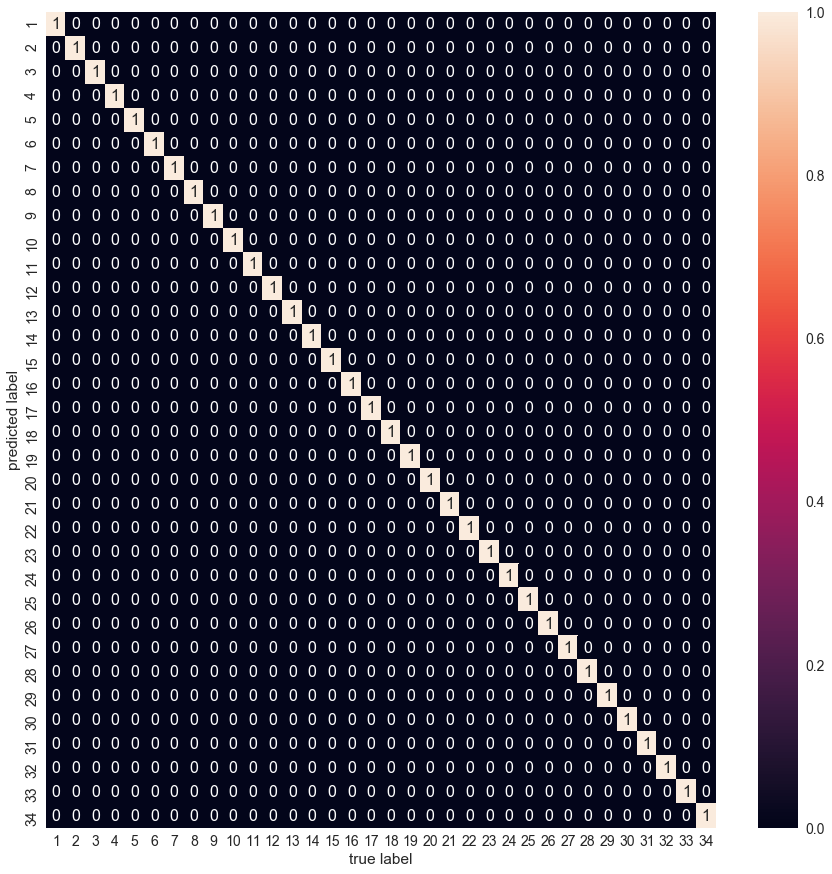

In [8]:
#### Print results and calculate confusion matrix
#### Print results and calculate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns; 
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)
plt.figure(figsize=(15,15))

y_true = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
y_pred = results

conf_matrix = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_matrix.T, annot=True, annot_kws={"size": 16}, fmt='d',
            xticklabels=y_true,
            yticklabels=y_pred)

plt.xlabel('true label')
plt.ylabel('predicted label');

plt.show()

# Compute F1 Score
Below we simply compute the f1_score which is 1.0:

In [9]:
from sklearn.metrics import f1_score

y_true = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,30, 31, 32, 33, 34]
y_pred = results

f1_score(y_true, y_pred, average='micro') 

1.0

# Display Stats
Here we use pandas_ml to display confusion matrix statistics; we see that the False Discovery Rate(FDR) is 0 :

In [10]:
from pandas_ml import ConfusionMatrix

import warnings; 

warnings.simplefilter('ignore')

conf_matrix_stats = ConfusionMatrix(y_true, y_pred)

conf_matrix_stats.print_stats()

Confusion Matrix:

Predicted  1  2  3  4  5  6  7  8  9  10   ...     26  27  28  29  30  31  32  \
Actual                                     ...                                  
1          1  0  0  0  0  0  0  0  0   0   ...      0   0   0   0   0   0   0   
2          0  1  0  0  0  0  0  0  0   0   ...      0   0   0   0   0   0   0   
3          0  0  1  0  0  0  0  0  0   0   ...      0   0   0   0   0   0   0   
4          0  0  0  1  0  0  0  0  0   0   ...      0   0   0   0   0   0   0   
5          0  0  0  0  1  0  0  0  0   0   ...      0   0   0   0   0   0   0   
6          0  0  0  0  0  1  0  0  0   0   ...      0   0   0   0   0   0   0   
7          0  0  0  0  0  0  1  0  0   0   ...      0   0   0   0   0   0   0   
8          0  0  0  0  0  0  0  1  0   0   ...      0   0   0   0   0   0   0   
9          0  0  0  0  0  0  0  0  1   0   ...      0   0   0   0   0   0   0   
10         0  0  0  0  0  0  0  0  0   1   ...      0   0   0   0   0   0   0   
11       